# INTRODUCCION

En el siguiente notebook atiende al desarrollo de TFM realizado por Cristian Sales Vila en el máster Análisis de Datos Masivos(Big Data) para los negocios en el curso 2022/2023.

Las enfermedades cardiovasculares son la principal causa de defunción en el mundo por lo que, cobrándose alrededor de 18 millones de vida al año.

A continuación se presenta un conjunto de datos que estaban disponibles de forma independiente per que no se habían combinado hasta el momento, generando un conjunto de entrenamiento mas grande. Estos datos contienen 11 características esenciales y altamente relevantes en para la detección prematura de enfermedades cardiovasculares.

# CONJUNTO DE DATOS

In [131]:
#Importamos las librerias iniciales que sabemos que vamos a utilziar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep

#Cargamos el conjunto de datos, en este caso es un csv separado por comas
data = pd.read_csv('heart.csv',sep=',')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Entendiendo los datos
Realizamos una primera fase de exploración de los datos

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Podemos observar que no tenemos valores nulos y todas las variables son numéricas de tipo flotante.

In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Se puede observar que la media y la varianza representan valores dispares entre algunas de las variables por lo que puede resultar interesante normalizar los datos.
Por otra parte la vatianza es 0 o muy próxima a 0 en algunos de los casos, lo que indica que hay pocos valores únicos y que muchos de ellos son ceros. Veremos más adelante como afectan estas variables y sus valores.

## Transformación de variables

Veamos los tipos de variables en las variables categóricas

In [134]:
data.groupby('Sex').nunique()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,43,4,41,129,2,3,73,2,28,3,2
M,48,4,64,198,2,3,118,2,52,3,2


In [135]:
data.groupby('ChestPainType').nunique()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
ChestPainType,,,,,,,,,,,
ASY,45,2,60,183,2,3,103,2,46,3,2
ATA,38,2,34,105,2,3,69,2,18,3,2
NAP,42,2,43,112,2,3,82,2,32,3,2
TA,31,2,21,39,2,3,30,2,23,3,2


In [136]:
data.groupby('RestingECG').nunique()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
RestingECG,,,,,,,,,,,
LVH,42,2,4,44,116,2,85,2,36,3,2
Normal,45,2,4,58,181,2,112,2,42,3,2
ST,43,2,4,42,94,2,70,2,31,3,2


In [137]:
data.groupby('ExerciseAngina').nunique()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
ExerciseAngina,,,,,,,,,,,
N,49,2,4,58,187,2,3,109,46,3,2
Y,43,2,4,54,157,2,3,89,40,3,2


In [138]:
data.groupby('ST_Slope').nunique()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
ST_Slope,,,,,,,,,,,
Down,28,2,4,32,38,2,3,40,2,30,2
Flat,45,2,4,53,174,2,3,101,2,41,2
Up,47,2,4,55,168,2,3,91,2,34,2


### Transformacion variables categóricas

Transformemos las variables categóricas con one hot encoding y variables dummies

In [139]:
data_transform=data.copy()
data_transform['Sex'] = np.where(data.Sex == 'F', 1, 0)
data_transform['ExerciseAngina'] = np.where(data.ExerciseAngina == 'N', 1, 0)

In [140]:
# Instanciamos la clase
encoder = prep.OneHotEncoder(sparse = False, min_frequency = 0.05, handle_unknown = 'infrequent_if_exist')

# Transformamos los datos
X = encoder.fit_transform(data_transform[['ChestPainType', 'RestingECG', 'ST_Slope']])

# Creamos la tabla transformada
onehot_data = pd.DataFrame(X, columns = encoder.get_feature_names_out())

C:\Users\csales\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [141]:
data_transform = pd.concat([data_transform, onehot_data], axis = 1)
dataset = data_transform.select_dtypes(include = 'number')


In [142]:
pd.options.display.max_columns = None
dataset_orig=dataset.copy()
dataset.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,1,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,1,160,180,0,156,1,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,0,130,283,0,98,1,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,1,138,214,0,108,0,1.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,0,150,195,0,122,1,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Normalización variables numérricas

A continuación se normnalizan las variables numéricas ajustándolas entre 0 y 1.

In [143]:
# Instanciamos la clase
scaler = prep.MinMaxScaler()

# Ajustamos y transformamos
X = scaler.fit_transform(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

# Creamos columnas con datos normalizados
dataset[['Age_norm', 'RestingBP_norm', 'Cholesterol_norm', 'MaxHR_norm', 'Oldpeak_norm']] = X


In [144]:
dataset = dataset.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], axis = 1)

In [145]:
dataset.head()

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_norm,RestingBP_norm,Cholesterol_norm,MaxHR_norm,Oldpeak_norm
0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.244898,0.70,0.479270,0.788732,0.295455
1,1,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.428571,0.80,0.298507,0.676056,0.409091
2,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.183673,0.65,0.469320,0.267606,0.295455
3,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.408163,0.69,0.354892,0.338028,0.465909
4,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.530612,0.75,0.323383,0.436620,0.295455


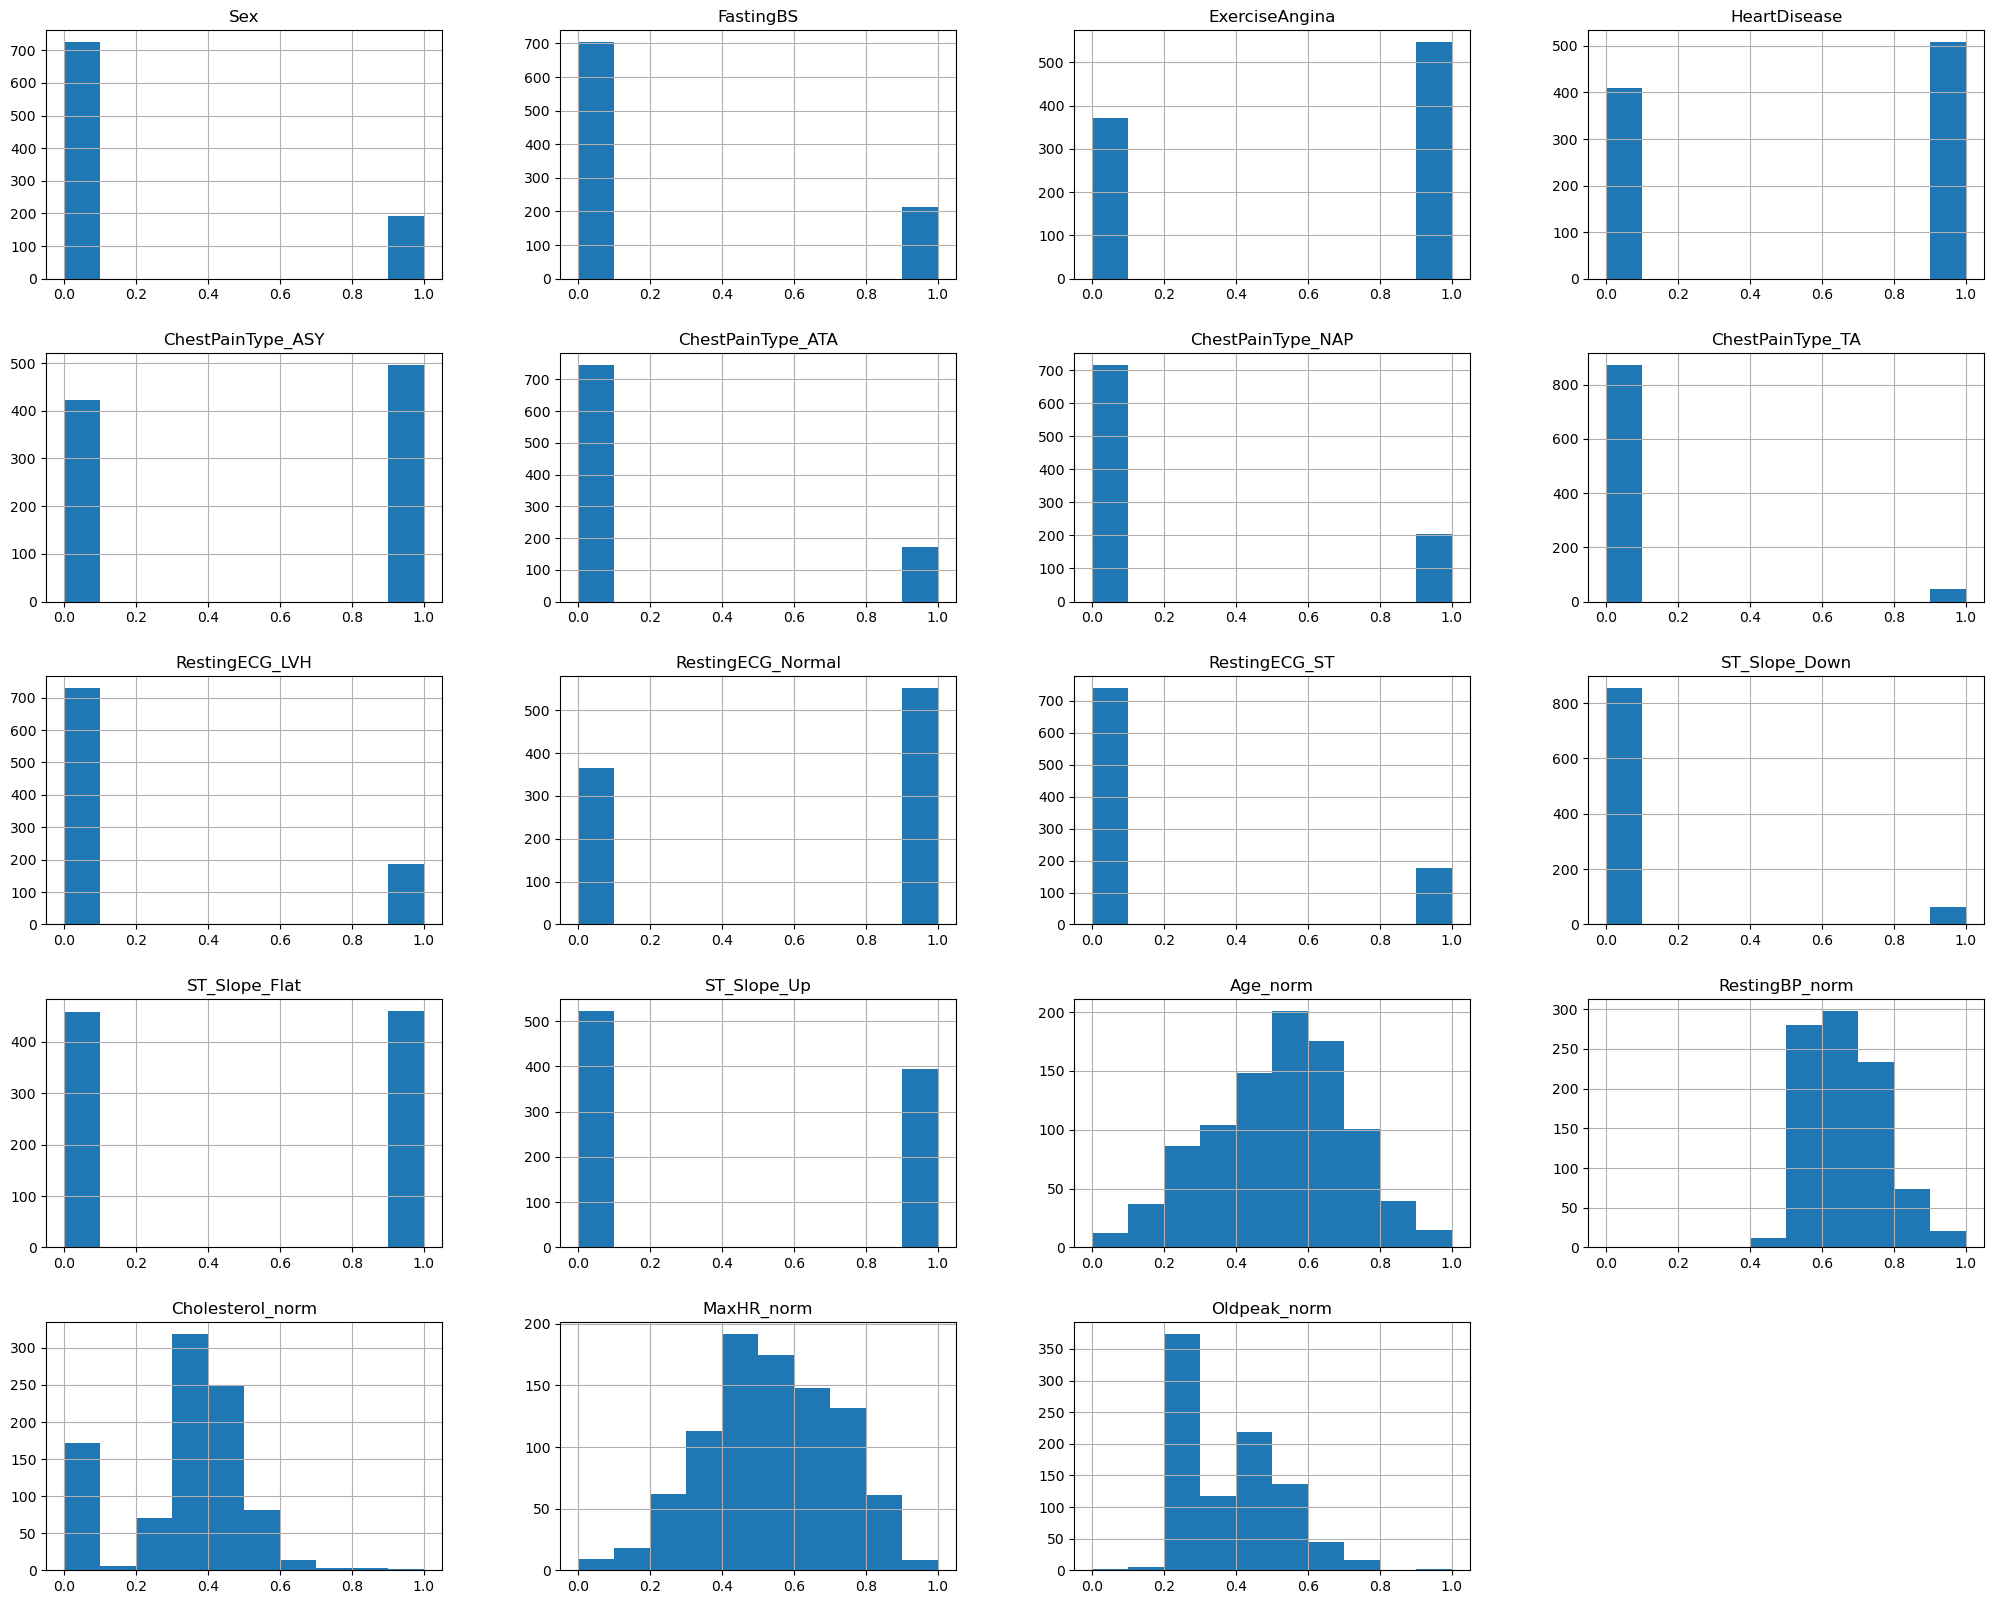

In [146]:
dataset.hist(figsize = (25,20))
plt.show()

## Correlaciones con el target e intercorrelaciones

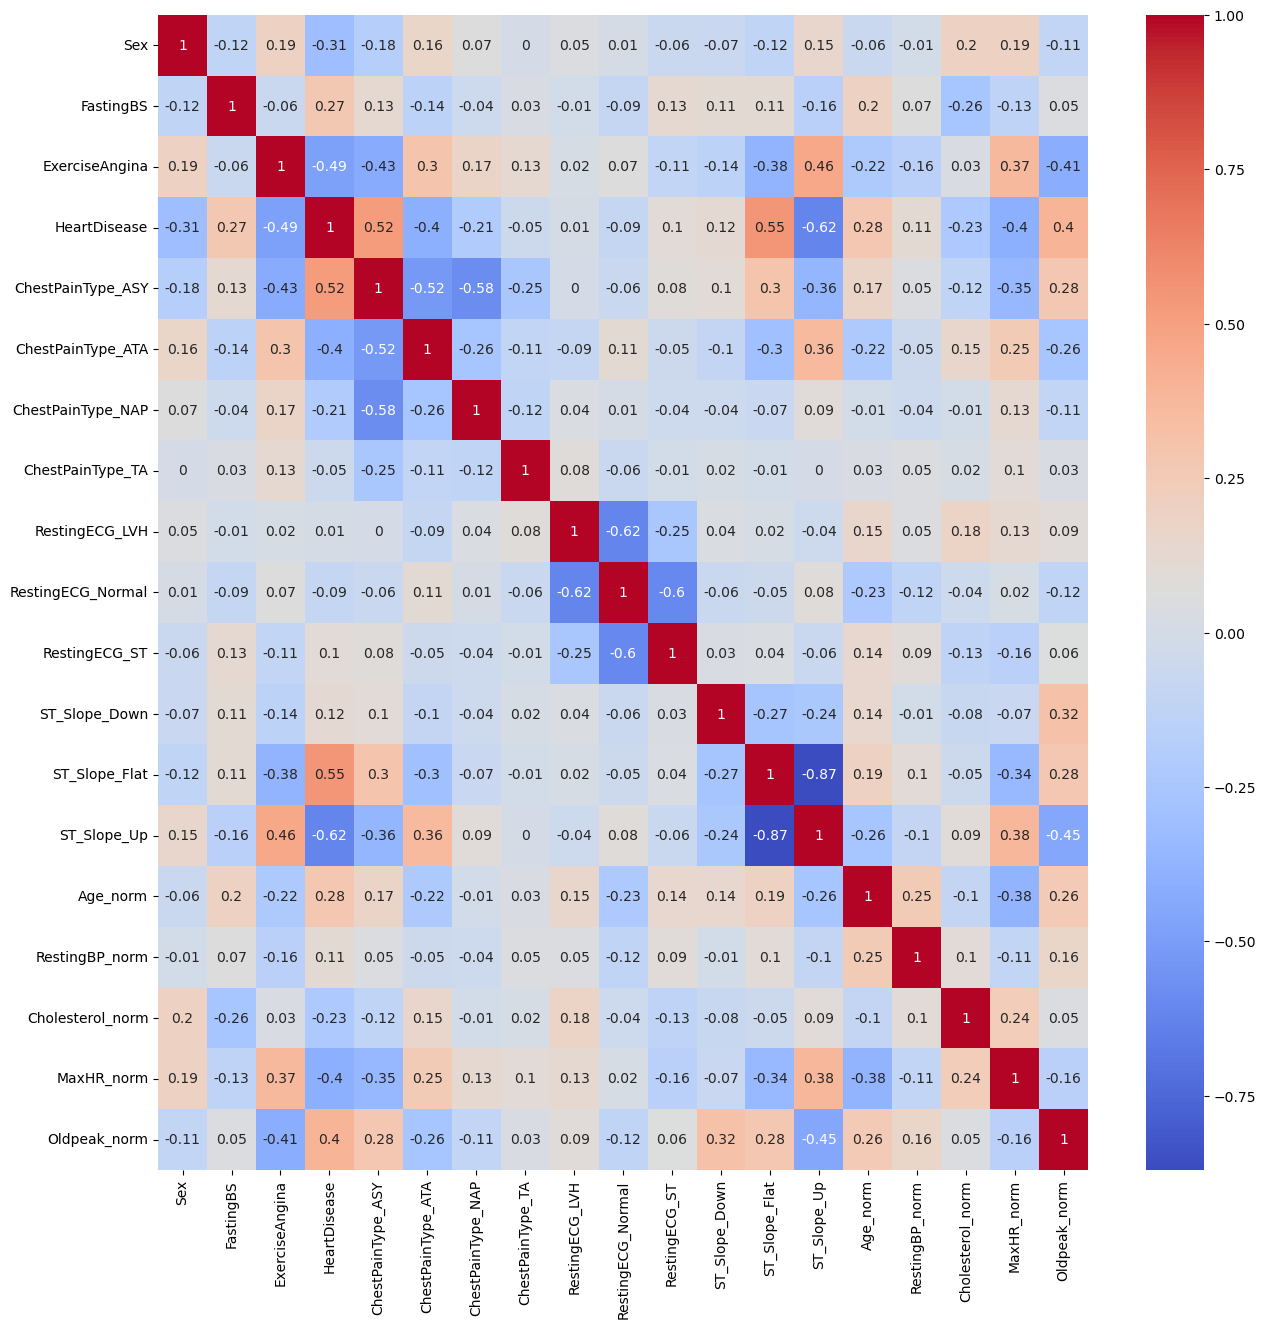

In [147]:
import seaborn as sns
correlation_matrix = dataset.corr().round(2)
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.yticks(ha='right')
plt.show()

Vemos que claramente hay ciertas variables que están muy correlacionadas con el target, por lo que pueden tener bastante peso a la hora de realizar las predicciones. Por otra parte hay ciertas variables relacionadas que estan correlacionadas entre sí. Esto puede suponer un problema en problemas de regresión, donde los modelos sufren mucho. En este caso de clasificación y con los modelos no lineales que vamos a utilziar decidimos no hacer nada de momento con estas variables y dejarlas en el dataset. Algunas de estas variables serán igualmente eliminadas mas adelante mediante la selección automática de variables con procesos mas robustos que la matriz de correlación.

## Detectando outliers

Comencemos con un breve análisis de detección de outliers mediante el método IsolationForest

In [148]:
from sklearn.ensemble import IsolationForest

# Creamos el modelo con parámetros por defecto
model = IsolationForest(random_state=42)

# Lo ajustamos con las variables numéricas, en este caso eliminando la variable target
model.fit(dataset.drop('HeartDisease', axis = 1))

IsolationForest(random_state=42)

In [149]:
data_outliers = dataset.copy()

data_outliers['score_anomaly'] = model.decision_function(dataset.drop('HeartDisease', axis = 1))
data_outliers['anomaly'] = model.predict(dataset.drop('HeartDisease', axis = 1))

data_outliers.head()

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_norm,RestingBP_norm,Cholesterol_norm,MaxHR_norm,Oldpeak_norm,score_anomaly,anomaly
0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.244898,0.70,0.479270,0.788732,0.295455,0.065410,1
1,1,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.428571,0.80,0.298507,0.676056,0.409091,-0.017763,-1
2,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.183673,0.65,0.469320,0.267606,0.295455,-0.031212,-1
3,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.408163,0.69,0.354892,0.338028,0.465909,0.033544,1
4,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.530612,0.75,0.323383,0.436620,0.295455,0.048695,1


In [150]:
anomalies = data_outliers[data_outliers.anomaly == -1]

print('Número de anomalías: %d' % anomalies.shape[0])

anomalies

Número de anomalías: 390


,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_norm,RestingBP_norm,Cholesterol_norm,MaxHR_norm,Oldpeak_norm,score_anomaly,anomaly
1,1,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.428571,0.800,0.298507,0.676056,0.409091,-0.017763,-1
2,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.183673,0.650,0.469320,0.267606,0.295455,-0.031212,-1
11,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.612245,0.680,0.271973,0.274648,0.522727,-0.065028,-1
14,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.285714,0.575,0.349917,0.542254,0.295455,-0.049188,-1
15,1,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.530612,0.600,0.452736,0.633803,0.465909,-0.024353,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.326531,0.600,0.280265,0.591549,0.613636,-0.027612,-1
908,0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.714286,0.700,0.310116,0.591549,0.750000,-0.026999,-1
911,0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.632653,0.820,0.291874,0.211268,0.409091,-0.018488,-1
913,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.346939,0.550,0.437811,0.507042,0.431818,-0.025084,-1


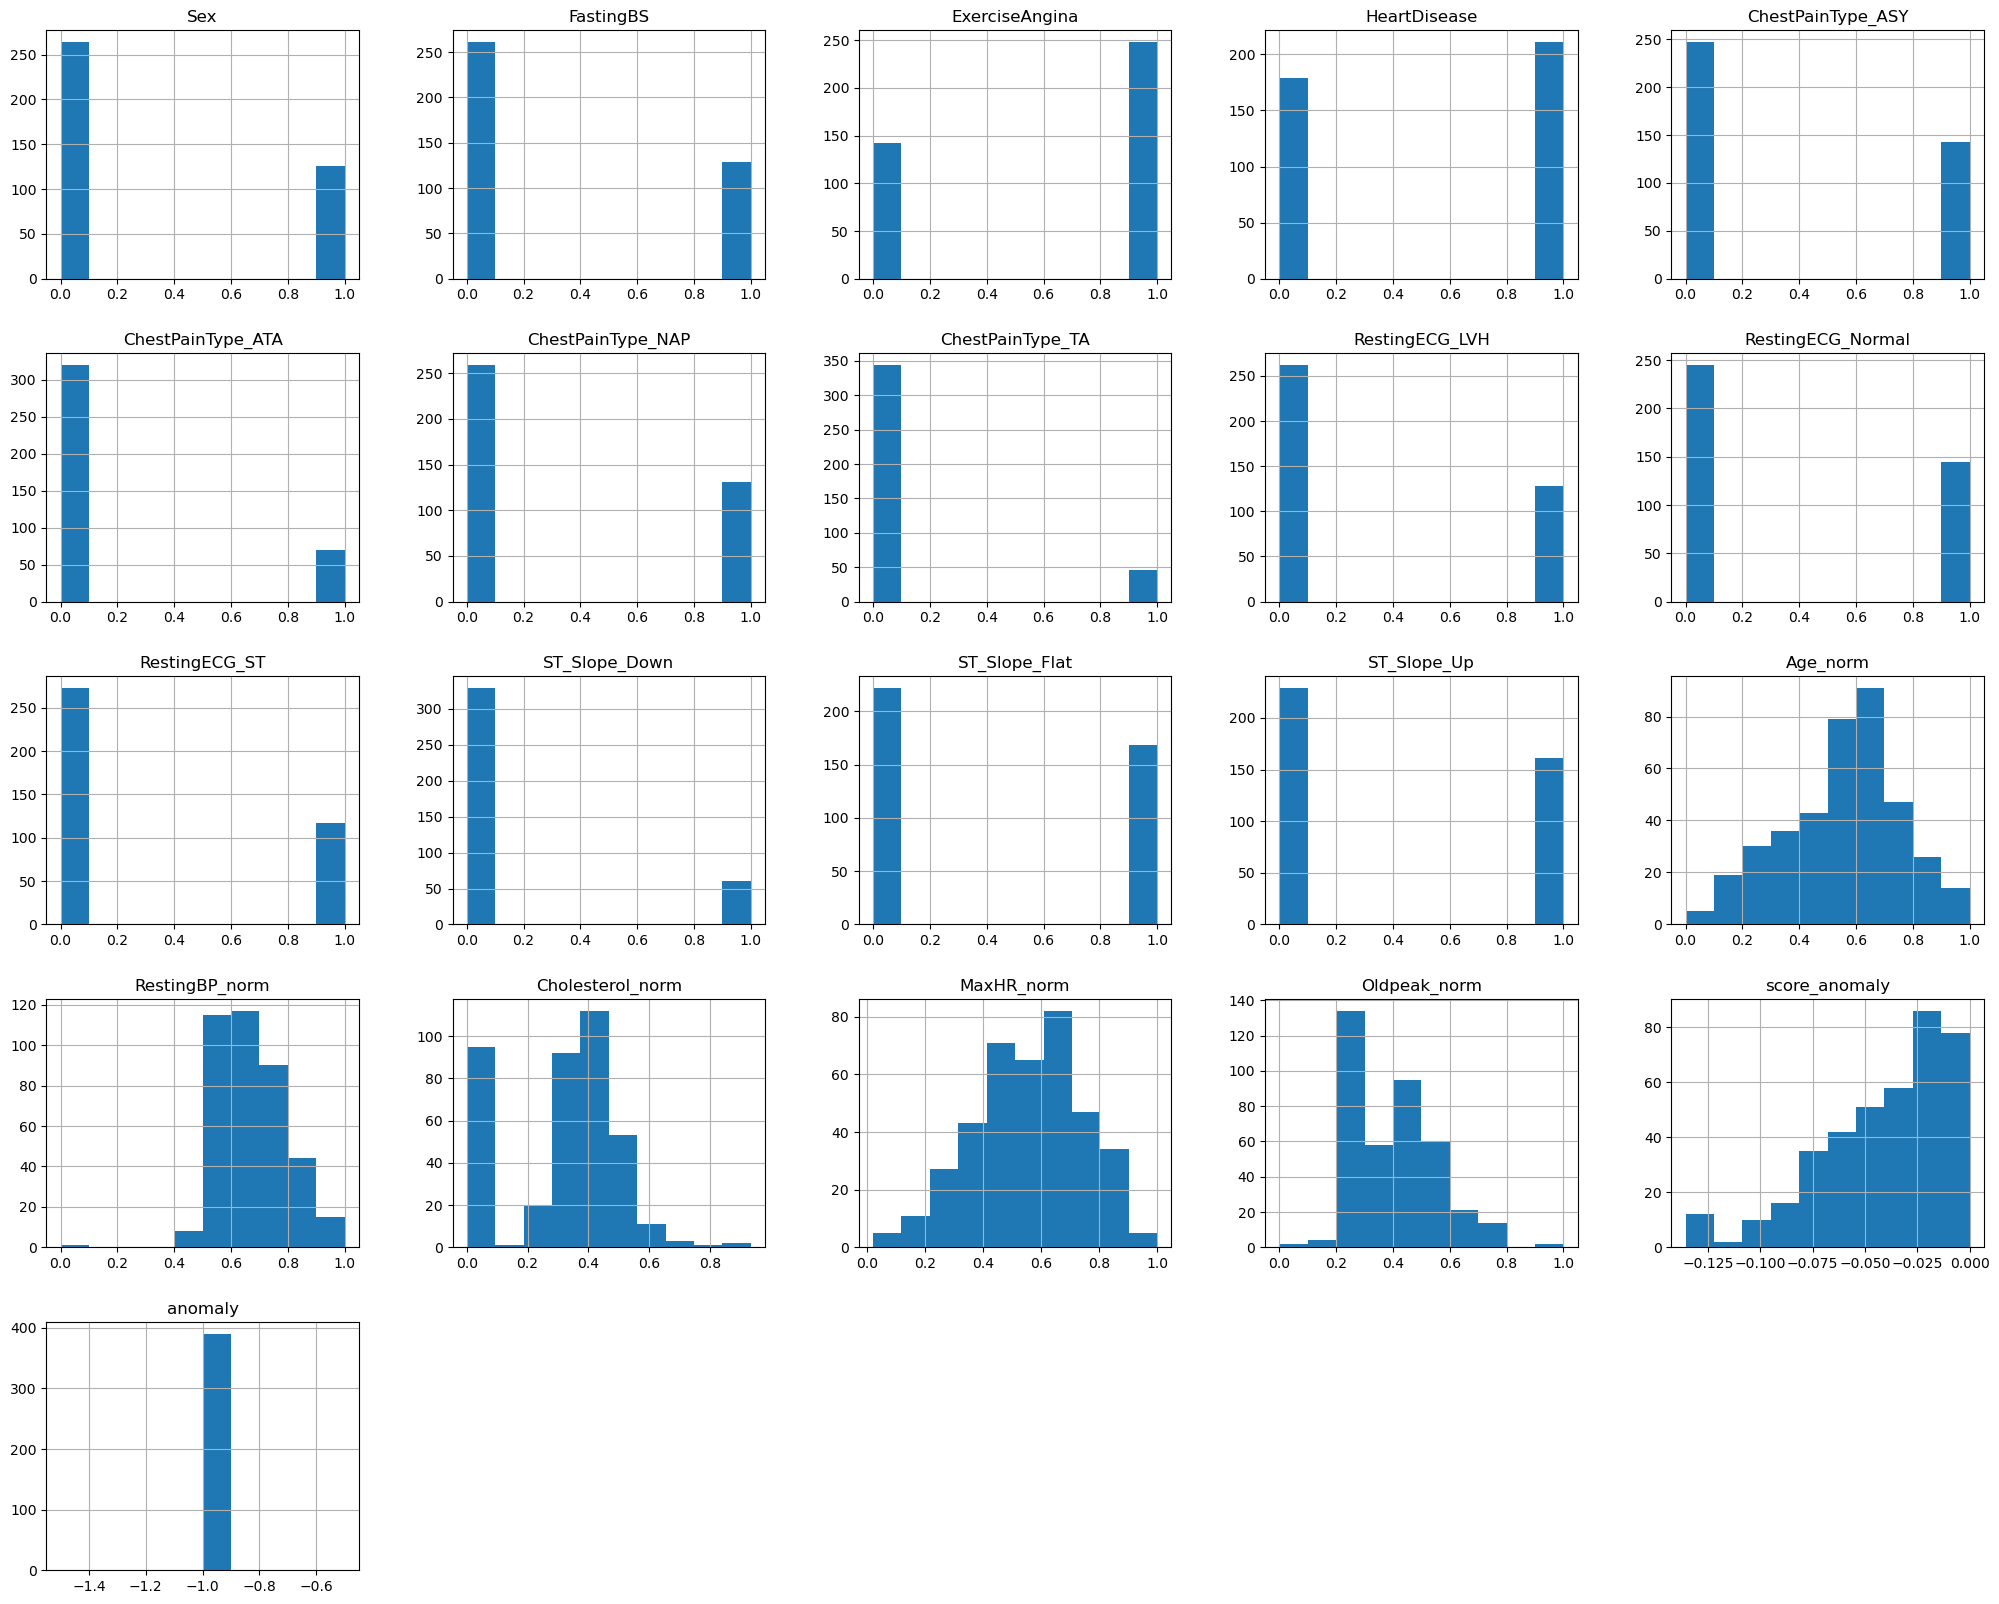

In [151]:
anomalies.hist(figsize = (25,20))
plt.show()

# SOLUCION

In [152]:
#Dividamos los datos en los subconjuntos de entrenamiento y test, separando tambien la varibale target

data_transform = dataset.drop(["HeartDisease"], axis = 1)
data_transform_target = dataset["HeartDisease"]

#dividimos en los subconjuntos de entrenamineto y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_transform, data_transform_target, test_size = 0.2, stratify=data_transform_target, random_state = 42)


In [153]:
resultados =pd.DataFrame()
resultados['Model']=None
resultados['Accuracy']=None
resultados['Precision']=None
resultados['Recall']=None

## Regresión logística

Empecemos aplicando un modelo de regresión logística con los datos en crudo

In [154]:
from sklearn.linear_model import LogisticRegression

# Creamos el objeto del modelo con parámetros por defecto, fijando la semilla para evitar aleatoriedad
logreg = LogisticRegression(random_state=42,solver='liblinear')

# Entrenamos con el conjunto de train y su target
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [155]:
print('Accuracy en train: ', logreg.score(X_train, y_train))
print('Accuracy en test: ', logreg.score(X_test, y_test))

Accuracy en train:  0.8637602179836512
Accuracy en test:  0.8913043478260869


In [156]:
y_pred = logreg.predict(X_test)

In [157]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.880
Recall 0.931
[[69 13]
 [ 7 95]]


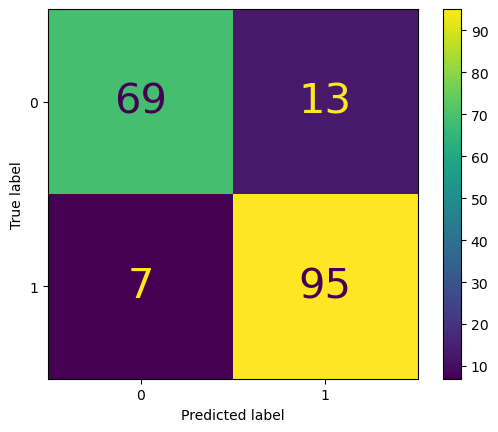

In [158]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

Es un resultado bastante bueno para ser la primera prueba, tenemos un buen porcentaje en los casos predichos como 0(Normal), aunque en los otros dos casos hay 7 pacientes que se están clasificando como Normal y deberían ser sospechosos y 13 pacientes que se están clasificando como sospechosos cuando deberían ser clasificados como normales. 

In [159]:
nueva_fila = { 'Model': 'LogisticRegresion', 'Accuracy': logreg.score(X_test, y_test), 'Precision': precision ,'Recall': recall} # creamos un diccionario
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\727422829.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


Probemos a hacer de nuevo una regresión logística con los datos sin normalizar

In [160]:
data_transform_no_norm = dataset_orig.drop(["HeartDisease"], axis = 1)
data_transform_target = dataset_orig["HeartDisease"]

X_train_no_norm, X_test_no_norm, y_train, y_test = train_test_split(data_transform_no_norm, data_transform_target, test_size = 0.2, stratify=data_transform_target, random_state = 42)

# Creamos el objeto del modelo con parámetros por defecto, fijando la semilla para evitar aleatoriedad
logreg = LogisticRegression(random_state=42,solver='liblinear')

# Entrenamos con el conjunto de train y su target
logreg.fit(X_train_no_norm, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [161]:
print('Accuracy en train: ', logreg.score(X_train_no_norm, y_train))
print('Accuracy en test: ', logreg.score(X_test_no_norm, y_test))

Accuracy en train:  0.8610354223433242
Accuracy en test:  0.8858695652173914


In [162]:
y_pred = logreg.predict(X_test_no_norm)
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.872
Recall 0.931
[[68 14]
 [ 7 95]]


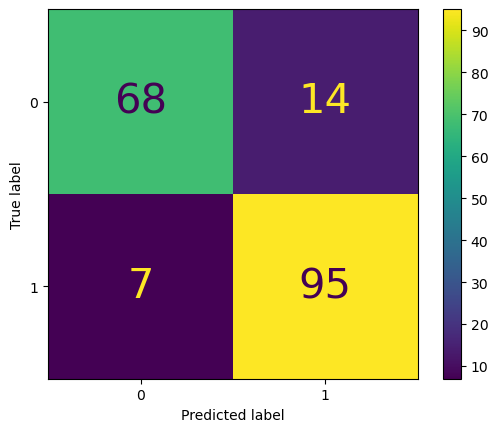

In [163]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

Como era de esperar y como sucede en la mayoría de los casos, la diferencia es muy pequeña pero obtenemos mejores resultados con los datos normalizados así que seguiremos trabajando con estos datos.

## Eliminando outliers

Por probar, vamos a eliminar los outlayer vistos anteriormente y analizaremos si mejora el resultado.

In [164]:
data_filtered = data_outliers[data_outliers.anomaly != -1]
new_data=data_filtered.drop(['score_anomaly','anomaly'],axis=1)


In [165]:
data_transform = new_data.drop(["HeartDisease"], axis = 1)
data_transform_target = new_data["HeartDisease"]

#dividimos en los subconjuntos de entrenamineto y test
X_train_no_outlayers, X_test_no_outlayers, y_train_no_outlayers, y_test_no_outlayers = train_test_split(data_transform, data_transform_target, test_size = 0.2, stratify=data_transform_target, random_state = 42)

# Creamos el objeto del modelo con parámetros por defecto, fijando la semilla para evitar aleatoriedad
logreg = LogisticRegression(random_state=42,solver='liblinear')

# Entrenamos con el conjunto de train y su target
logreg.fit(X_train_no_outlayers, y_train_no_outlayers)


LogisticRegression(random_state=42, solver='liblinear')

In [166]:
print('Accuracy en train: ', logreg.score(X_train_no_outlayers, y_train_no_outlayers))
print('Accuracy en test: ', logreg.score(X_test_no_outlayers, y_test_no_outlayers))

Accuracy en train:  0.9052132701421801
Accuracy en test:  0.8962264150943396


In [167]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.879
Recall 0.853
[[70 12]
 [15 87]]


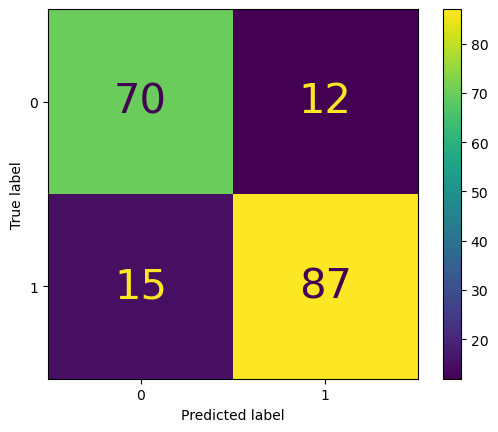

In [168]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

El rendimiento ha mejorado un poco. Realizaremos las paralelamente las pruebas sin estos outlayers para ver que resultados obtenemos.

In [169]:
nueva_fila = { 'Model': 'LogisticRegresion_No_Outlayers', 'Accuracy': logreg.score(X_test_no_outlayers, y_test_no_outlayers), 'Precision': precision ,'Recall': recall} # creamos un diccionario
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\795356729.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


Probemos con otros algoritmos para comparar resultados.

## Arbol de decisión

In [170]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state = 42)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [171]:
y_pred = tree_class.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.806
Recall 0.814
[[62 20]
 [19 83]]


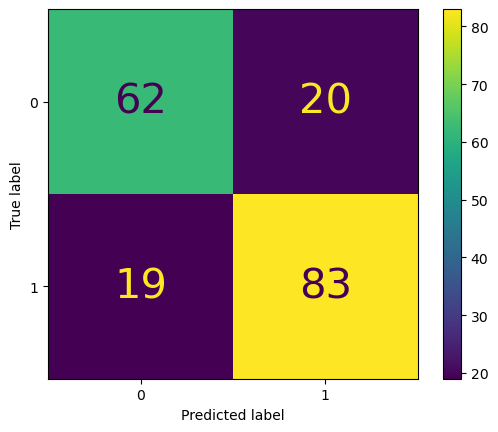

In [172]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

El modelo de arbol sencillo no ha ofrecido muy buenos resultados en comparación a la regresión logística utilizada anteriormente.

In [173]:
nueva_fila = { 'Model': 'Decission_Tree', 'Accuracy': tree_class.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\224137055.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Maquina vector soporte

In [174]:
from sklearn.svm import SVC

svc = SVC(random_state=42) # parámetros por defecto

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.857
Recall 0.941
[[66 16]
 [ 6 96]]


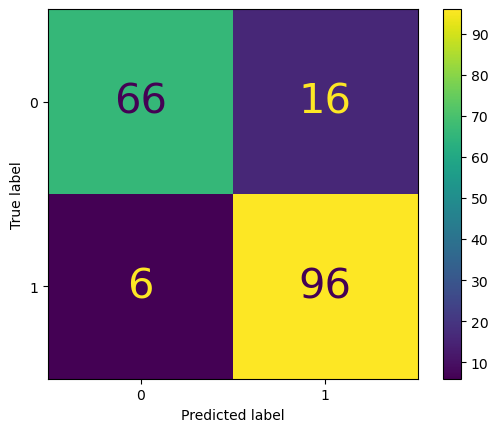

In [175]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

El resultado es similar al obtenido con la regresión.

In [176]:
nueva_fila = { 'Model': 'SVC', 'Accuracy': svc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\2181927676.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## SVC_No_Outlayers

In [177]:
svc = SVC(random_state=42) # parámetros por defecto

svc.fit(X_train_no_outlayers, y_train_no_outlayers)

y_pred = svc.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.836
Recall 0.902
[[64 18]
 [10 92]]


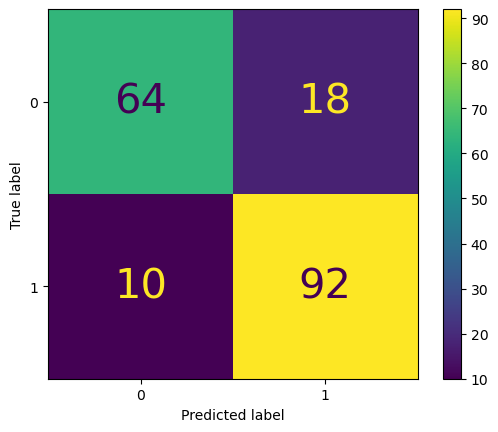

In [178]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [179]:
nueva_fila = { 'Model': 'SVC_No_Outlayers', 'Accuracy': svc.score(X_test_no_outlayers, y_test_no_outlayers), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1180993658.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Ajustando hiperparámetros para SVC

In [180]:
from sklearn.model_selection import GridSearchCV

# Parámetros de búsqueda y posibles valores
grid_parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [10.0, 1.0, 0.1, 0.01, 0.001]}

# Grid search, cv es validacion cruzada por lo que divido en este caso el conjunto entre 3
grid = GridSearchCV(SVC(random_state=42), param_grid = grid_parameters, cv = 3, scoring = 'recall', verbose=2)

# Comenzamos el entrenamiento
grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

print(grid.best_estimator_)

y_pred = grid.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)



Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END .................................C=10.0, kernel=rbf; total time=   0.0s
[CV] END .................................C=10.0, kernel=rbf; total time=   0.0s
[CV] END .................................C=10.0, kernel=rbf; total time=   0.0s
[CV] END ................................C=10.0, kernel=poly; total time=   0.0s
[CV] END ................................C=10.0, kernel=poly; total time=   0.0s
[CV] END ................................C=10.0, kernel=poly; total time=   0.0s
[CV] END ...............................C=1.0, kernel=linear; total time=   0.0s
[CV] END ...............................C=1.0, kernel=linear; total time=   0.0s
[CV] END ...............................C=1.0, k

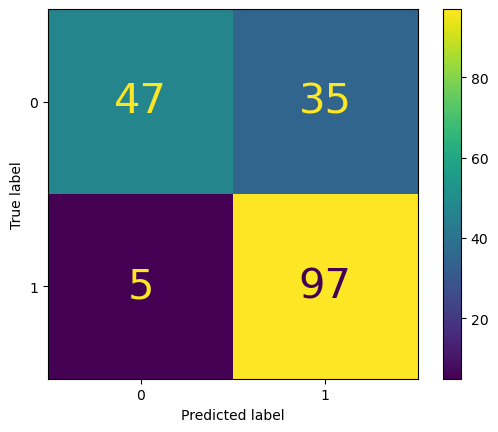

In [181]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [182]:
nueva_fila = { 'Model': 'SVC_Best_Params', 'Accuracy': grid.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1037090493.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Knn

In [183]:
#Para este modelo necesitamos tener los datos normalizados ya que 
#trabajamos con distancias, algo que hemos hecho anteriormente así que partiremos de esta información
from sklearn.neighbors import KNeighborsClassifier

# Por defecto, k = 5
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.912
Recall 0.912
[[73  9]
 [ 9 93]]


In [184]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

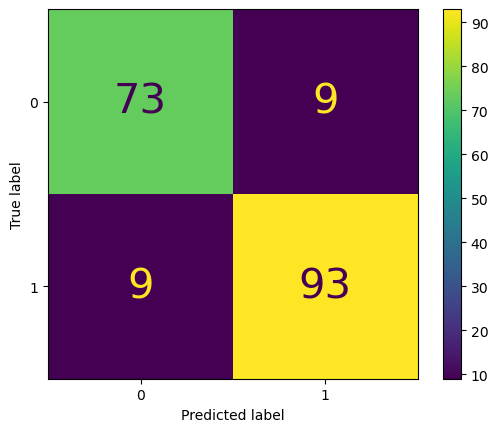

In [185]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [186]:
nueva_fila = { 'Model': 'Knn', 'Accuracy': knn.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\3163775932.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [187]:
resultados.head()

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961


Seguimos teniendo unos resultados similares

## KNN No_Outlayers

In [188]:
# Por defecto, k = 5
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_no_outlayers, y_train_no_outlayers)

y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.886
Recall 0.912
[[70 12]
 [ 9 93]]


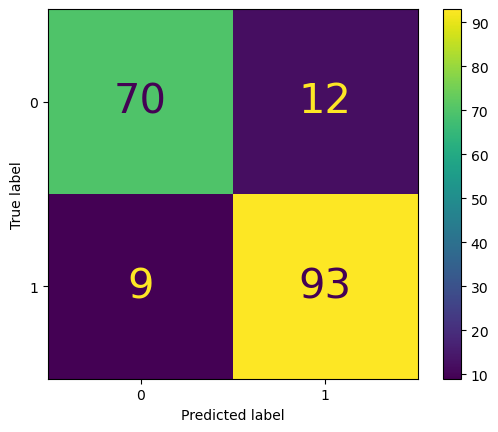

In [189]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

Probemos con diferentes K y dibujando la curva AUC ya que este modelo es muy propenso a sobreajuste si no ajustamos bien la K.

In [190]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

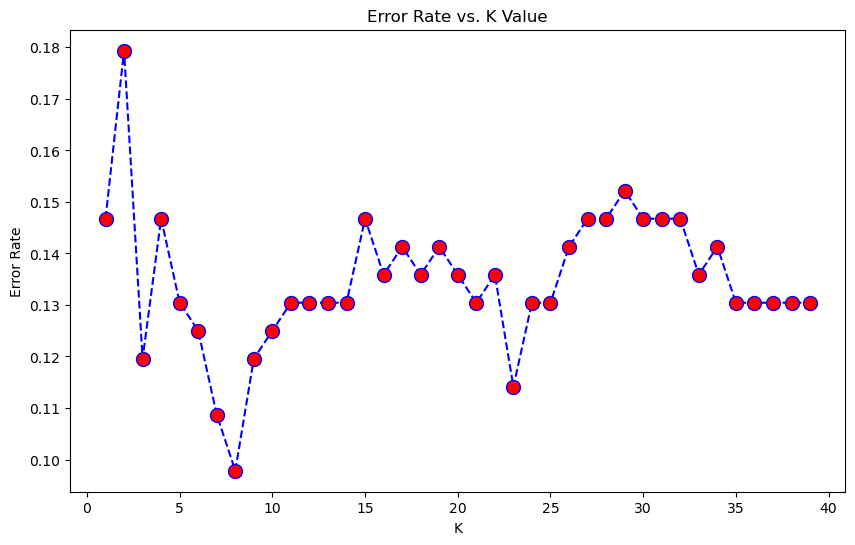

In [191]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

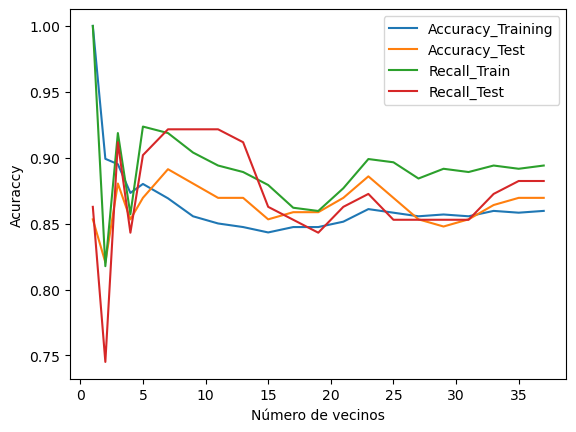

In [192]:
# Valores posibles de k
from sklearn.metrics import accuracy_score
K = [1,2,3,4, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]

aucs_train = []
aucs_test = []
rec_train = []
rec_test = []

# Entrenamos cada modelo distinto
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    # Calculamos la accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train, average = 'binary')
    recall_test = recall_score(y_test, y_pred_test, average = 'binary')
    
    aucs_train.append(accuracy_train)
    aucs_test.append(accuracy_test)
    rec_train.append(recall_train)
    rec_test.append(recall_test)
    
plt.plot(K, aucs_train, label = 'Accuracy_Training')
plt.plot(K, aucs_test, label = 'Accuracy_Test')
plt.plot(K, rec_train, label = 'Recall_Train')
plt.plot(K, rec_test, label = 'Recall_Test')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Acuraccy')
plt.show()

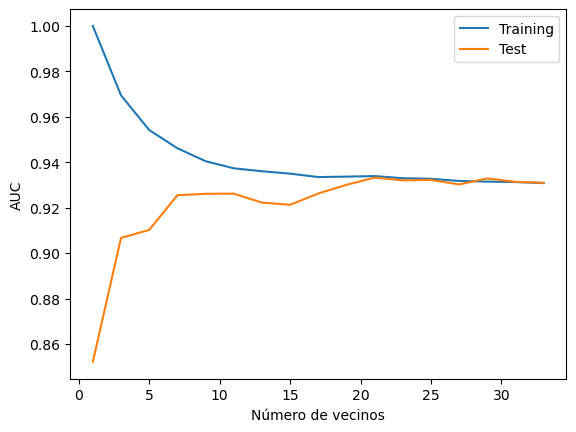

In [193]:
from sklearn.metrics import roc_auc_score, auc

# Valores posibles de k
K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]

aucs_train = []
aucs_test = []

# Entrenamos cada modelo distinto
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    preds_train = knn.predict_proba(X_train)
    preds_test = knn.predict_proba(X_test)
    # Medimos el error
    auc_train = roc_auc_score(y_train, preds_train[:,1], multi_class = 'ovo')
    auc_test = roc_auc_score(y_test, preds_test[:,1], multi_class = 'ovo')
    
    aucs_train.append(auc_train)
    aucs_test.append(auc_test)
    
plt.plot(K, aucs_train, label = 'Training')
plt.plot(K, aucs_test, label = 'Test')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('AUC')
plt.show()

Vemos que en general tenemos un poco de sobreajuste  pero en este caso la elección de la K no afecta mucho, podríamos dejarlo con k=5 o k=6

## Ajustando hiperparametros knn

Probemos a hacer un análisis y ajuste de hiperparámetros del KNN

In [194]:
#from sklearn.model_selection import GridSearchCV

# Parámetros de búsqueda y posibles valores
#grid_parameters = {'weights': ['uniform', 'distance',], 'n_neighbors': [3, 4, 5, 6, 8],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[15, 20, 25, 30, 35, 40, 45, 50]}

# Grid search, cv es validacion cruzada por lo que divido en este caso el conjunto entre 3
#grid = GridSearchCV(KNeighborsClassifier(), param_grid = grid_parameters, cv = 3, scoring = 'recall', verbose=2)

# Comenzamos el entrenamiento
#grid.fit(X_train, y_train)

In [195]:
#print(grid.best_params_)

#print(grid.best_score_)

#print(grid.best_estimator_)

In [196]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=8,weights='uniform')

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.912
Recall 0.912
[[73  9]
 [ 9 93]]


In [197]:
nueva_fila = { 'Model': 'Knn_Best_Params', 'Accuracy': knn.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\3430734304.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [198]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765


Hemos mejorado un poco el resultado optimizando los hiperparámetros. Sigamos probando modelos.

## Perceptron multicapa

In [199]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Precision: 0.855
Recall 0.922
[[66 16]
 [ 8 94]]


C:\Users\csales\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


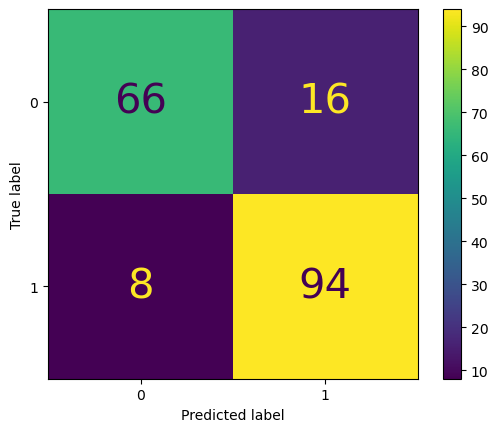

In [200]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [201]:
nueva_fila = {'Model': 'MLP', 'Accuracy': knn.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\3092355526.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [202]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569


En este caso esta red neuronal sencilla no está ofreciendo un gran resultado. Tal vez podríamos mejorarlo ajustado parámetros o probando otros tipos pero en principio vamos a intentar resolver el problema con los modelos tradicionales sin entrar en deep learning.

## Seleccion automatica de variables

Hagamos un análisis de los diferentes pesos de las variables por si hay algunas que podamos eliminar si no aportan información útil

In [203]:
# Para regresión
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Seleccionamos las 5 mejores variables
selector = SelectKBest(f_classif, k=13)#podria omitir el k=5 y me devolveria todas las variables y sus pesos

X_select = selector.fit_transform(X_train, y_train)

print(X_select.shape)

print(selector.get_feature_names_out())

for var, value in zip(selector.feature_names_in_, selector.scores_):
    print('Variable %s: %.4f' % (var, value))

(734, 13)
['Sex' 'FastingBS' 'ExerciseAngina' 'ChestPainType_ASY'
 'ChestPainType_ATA' 'ChestPainType_NAP' 'ST_Slope_Down' 'ST_Slope_Flat'
 'ST_Slope_Up' 'Age_norm' 'Cholesterol_norm' 'MaxHR_norm' 'Oldpeak_norm']
Variable Sex: 62.3769
Variable FastingBS: 53.6821
Variable ExerciseAngina: 232.3712
Variable ChestPainType_ASY: 268.6632
Variable ChestPainType_ATA: 136.5993
Variable ChestPainType_NAP: 39.5864
Variable ChestPainType_TA: 1.8200
Variable RestingECG_LVH: 0.3629
Variable RestingECG_Normal: 7.7707
Variable RestingECG_ST: 8.0657
Variable ST_Slope_Down: 15.8422
Variable ST_Slope_Flat: 353.7344
Variable ST_Slope_Up: 532.7271
Variable Age_norm: 46.6181
Variable RestingBP_norm: 7.7041
Variable Cholesterol_norm: 45.3013
Variable MaxHR_norm: 145.5228
Variable Oldpeak_norm: 120.9776


Se observa que hay bastante variables que tienen un peso bastante bajo en realación al resto, en general podemos observar que hay ciertas variables con peso por bajo de 50 que podríamos eliminar, lo probaremos más adelante. Esto tiene una relación  directa con la matriz de correlación mostrada al principio, donde podemos ver que hay ciertas diferencias de correlación entre variables y target

In [204]:
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
dataset_selector = dataset[selected_features].copy()
dataset_selector.head()

,Sex,FastingBS,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_norm,Cholesterol_norm,MaxHR_norm,Oldpeak_norm
0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.244898,0.479270,0.788732,0.295455
1,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.428571,0.298507,0.676056,0.409091
2,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.183673,0.469320,0.267606,0.295455
3,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.408163,0.354892,0.338028,0.465909
4,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.530612,0.323383,0.436620,0.295455


In [205]:
#data_transform = dataset.drop(["HeartDisease"], axis = 1)
data_transform_target = dataset["HeartDisease"]

#dividimos en los subconjuntos de entrenamineto y test
from sklearn.model_selection import train_test_split
X_train_select_kbest, X_test_select_kbest, y_train, y_test = train_test_split(dataset_selector, data_transform_target, test_size = 0.2, stratify=data_transform_target, random_state = 42)

## Random forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

# Un único árbol
tree = DecisionTreeClassifier(random_state = 42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Árbol de decisión')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

# Random forest con 50 estimadores
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)

rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)



precision = precision_score(y_test, y_pred2, average = 'binary')
recall = recall_score(y_test, y_pred2, average = 'binary')
cm = confusion_matrix(y_test, y_pred2)
print('')
print('Random forest')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)

Árbol de decisión
Precision: 0.806
Recall 0.814
[[62 20]
 [19 83]]

Random forest
Precision: 0.903
Recall 0.912
[[72 10]
 [ 9 93]]


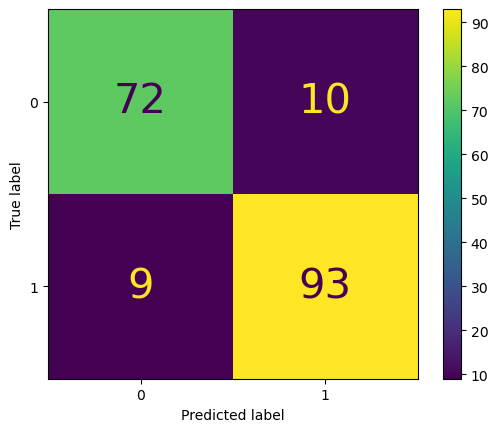

In [207]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [208]:
nueva_fila = { 'Model': 'RF', 'Accuracy': rf.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1642358817.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Ajustando hiperparámetros en Random Forest

A continuación hacemos un análisis de los mejores hiperparámetros en el caso del Random Forest. Se han probado con muchisimos
hiperparámetros para obtener el mejor resultado, a continuacióin se prueba tan solo con unos pocos ya que se ha obtenido el mejor resultado y así reducir el tiempo de ejecución del notebook(que probando muchos hiperparámetros era muy elevado)

In [209]:
#from sklearn.model_selection import GridSearchCV

# Parámetros de búsqueda y posibles valores
#grid_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],'max_depth':[2 ,3 ,4 , 5, 6, 7, 8, 9, 10],'n_estimators':[80, 100, 110, 120, 130, 140]}
# Grid search, cv es validacion cruzada por lo que divido en este caso el conjunto entre 3
#grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid = grid_parameters, cv = 6, scoring = 'accuracy', verbose=2)

# Comenzamos el entrenamiento
#grid.fit(X_train, y_train)

In [210]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

y_pred=grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

{'C': 0.01, 'kernel': 'rbf'}
1.0
SVC(C=0.01, random_state=42)
[[47 35]
 [ 5 97]]


Volvemos a obtener la matriz de confusión y tasa de acierto con los mejores parámetros seleccionados, para el randomforest

In [211]:
rf = RandomForestClassifier(n_estimators = 110, random_state = 42, max_depth=4, criterion='entropy')

rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)



precision = precision_score(y_test, y_pred2, average = 'binary')
recall = recall_score(y_test, y_pred2, average = 'binary')
cm = confusion_matrix(y_test, y_pred2)
print('')
print('Random forest')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)


Random forest
Precision: 0.848
Recall 0.931
[[65 17]
 [ 7 95]]


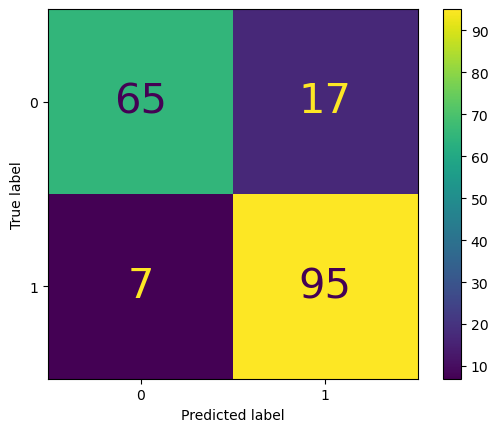

In [212]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [213]:
nueva_fila = { 'Model': 'RF_best_params', 'Accuracy': rf.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1971962558.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Gradient Boost

Partiendo de que RF nos ha ofrecido un buen resultado, Gradient Boosting podría mejorar el resultado ya que corrige errores en las predicciones anteriores.

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 42)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Gradient Boost Classifier')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print(cm)

Gradient Boost Classifier
Precision: 0.902
Recall: 0.902
[[72 10]
 [10 92]]


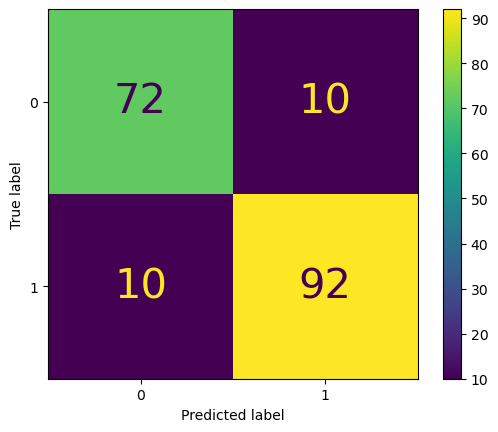

In [215]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [216]:
nueva_fila = { 'Model': 'Gradient_Boost', 'Accuracy': gbc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\2777712004.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [217]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


Al igual que el RandomForest, siendo ambos modelos similares en funcionamiento, nos ofrece un muy buen resultado.

## Ajustando hiperparámetros de GradientBoost

Como GradientBoost nos ha ofrecido un muy buen resultado, vamos a hacer una amplia busqueda de los mejores hiperaprámetros, sin poder probarlos todos obviamente ya que tiene muchos y el tiempo de ejecución sería enorme sin disponer de una muy potente CPU.
Se ha comentado la siguiente celda ya que aún así lleva bastante tiempo de ejecución y ya se han obtenido los mejores hiperparámetros.

In [218]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import GradientBoostingClassifier
#from scipy.stats import randint

# Definir los hiperparámetros y sus rangos de búsqueda
#param_dist = {
#    'loss': ['log_loss', 'exponential'],
#    'criterion': ['friedman_mse', 'squared_error'],
#    'n_estimators': [70,75, 80,85, 90,95, 100,105, 110,115, 120,125, 130,135, 140,145,150,155,160],
#    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
#    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#    'subsample': [0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1],
#    'max_features': ['sqrt','log2','None'],
#    'verbose': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
#}

# Crear el estimador y realizar la búsqueda aleatoria
#estimator = GradientBoostingClassifier(random_state=42)
#random_search = RandomizedSearchCV(estimator, param_distributions=param_dist, cv=3, scoring='recall', n_iter=100, random_state=42)
#random_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda aleatoria
#print('Gradient Boost Classifier')
#print('')
#print('Best Params')
#print(random_search.best_params_)
#print('')
#print('Best Score')
#print(random_search.best_score_)
#print('')
#print(random_search.best_estimator_)
#print('')

#y_pred = random_search.predict(X_test)

#cm = confusion_matrix(y_test, y_pred)
#print('Gradient Boost Confusion Matrix')
#print(cm)

Probemos la predicción con esos parámetros en el conjunto de test

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 42,criterion='friedman_mse',learning_rate=0.1,loss='exponential',max_depth=11, n_estimators=115,subsample=0.3,verbose=8,max_features='log2')

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Gradient Boost Classifier Best Params')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('')
print('Confusion Matrix')
print('')
print(cm)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8980           0.0505            0.55s
         2           0.8481           0.0363            0.58s
         3           0.8050           0.0449            0.57s
         4           0.7482           0.0405            0.56s
         5           0.7025           0.0319            0.56s
         6           0.6523           0.0256            0.54s
         7           0.6121           0.0276            0.53s
         8           0.5930           0.0263            0.52s
         9           0.5414           0.0172            0.52s
        10           0.5215           0.0192            0.52s
        11           0.4906           0.0158            0.52s
        12           0.4522           0.0155            0.52s
        13           0.4580           0.0113            0.51s
        14           0.4529           0.0073            0.51s
        15           0.4451           0.0064            0.50s
       

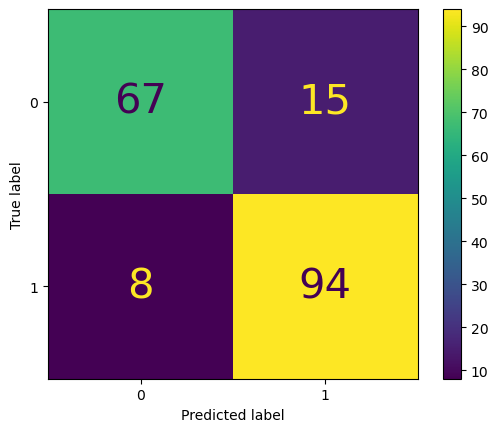

In [220]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [221]:
nueva_fila = { 'Model': 'GB_best_params', 'Accuracy': gbc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\3964025581.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [222]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


En este caso el resultado también es muy similar a las métricas obtenidas con los parámetros por defecto.

## AdaBost

In [223]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42,learning_rate=1)
ab.fit(X_train, y_train)

y_pred=ab.predict(X_test)

precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)

print('Gradient Boost Classifier')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print(cm)

Gradient Boost Classifier
Precision: 0.892
Recall: 0.892
[[71 11]
 [11 91]]


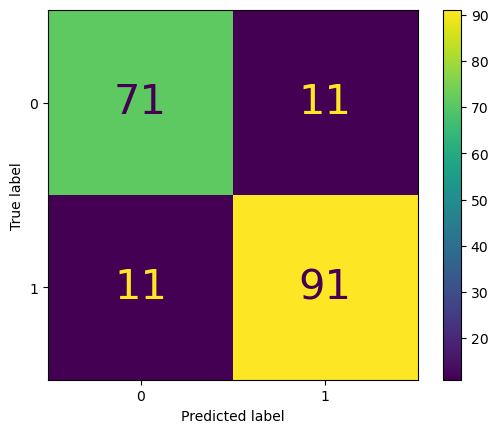

In [224]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [225]:
nueva_fila = { 'Model': 'Ada_Boost', 'Accuracy': ab.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1623567661.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [226]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


AdaBost por el contrario nos está empeorando las predicciones comparado los modelos anteriores.

## Ajustannso hiperparámetros AdaBost

In [227]:
# Parámetros de búsqueda y posibles valores

#grid_parameters = {'n_estimators':[40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],'learning_rate':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4],}

# Grid search, cv es validacion cruzada por lo que divido en este caso el conjunto entre 3
#grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid = grid_parameters, cv = 4, scoring = 'accuracy', verbose=2)

# Comenzamos el entrenamiento
#grid.fit(X_train, y_train)

In [228]:
#print(grid.best_params_)
#print(grid.best_score_)
#print(grid.best_estimator_)

#y_pred=grid.predict(X_test)

#cm = confusion_matrix(y_test, y_pred)
#print(cm)

In [229]:
ab = AdaBoostClassifier(n_estimators = 40, random_state = 42,learning_rate=0.3)

ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)



precision = precision_score(y_test, y_pred, average = 'binary')
recall = recall_score(y_test, y_pred, average = 'binary')
cm = confusion_matrix(y_test, y_pred)
print('')
print('AdaBoost')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)
print(cm)


AdaBoost
Precision: 0.903
Recall 0.912
[[72 10]
 [ 9 93]]


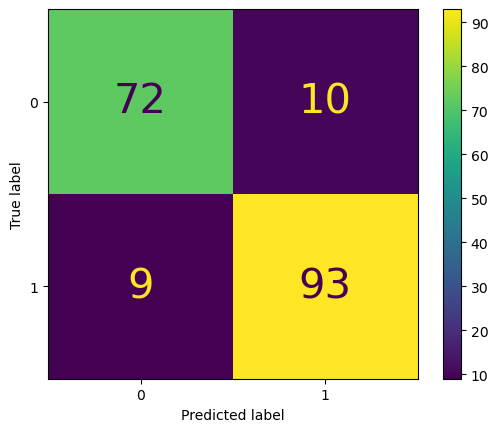

In [230]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [231]:
nueva_fila = { 'Model': 'AB_Best_Params', 'Accuracy': ab.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1953133910.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [232]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


En este caso se ha mejorado el resultado ajustando los hiperparámetros. 

## Ensemble: combinacion de modelos

Partiendo de las preubas realizadas, probemos a recurrir a la combinación de distintos modelos para intentar mejorar el rendimiento del sistema.

In [233]:
from sklearn.ensemble import VotingClassifier

# Creamos ambos modelos independientes
model1 = RandomForestClassifier(n_estimators = 50, random_state = 42,max_depth=None, criterion='gini', max_features='sqrt', verbose=0)
model2 = GradientBoostingClassifier(random_state = 42,criterion='friedman_mse',learning_rate=0.1,loss='exponential',max_depth=3, n_estimators=160,subsample=0.8)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print('Accuracy RandomForest: %.3f' % model1.score(X_test, y_test))
print('Accuracy GradientBoost: %.3f' % model2.score(X_test, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('GB', model2)], voting = 'soft')
vc.fit(X_train, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test, y_test))

y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=vc.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)

print()
print('Confusion Matrix Random Forest')
print(cm1)
print()
print('Confusion Matrix Gradient Boost')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)


Accuracy RandomForest: 0.897
Accuracy GradientBoost: 0.891
Accuracy modelo combinado: 0.897
Precision: 0.911
Recall 0.902

Confusion Matrix Random Forest
[[72 10]
 [ 9 93]]

Confusion Matrix Gradient Boost
[[72 10]
 [10 92]]

Confusion Matrix Modelo Combinado
[[73  9]
 [10 92]]


In [234]:
nueva_fila = { 'Model': 'RF+GB', 'Accuracy': vc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\2439742007.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


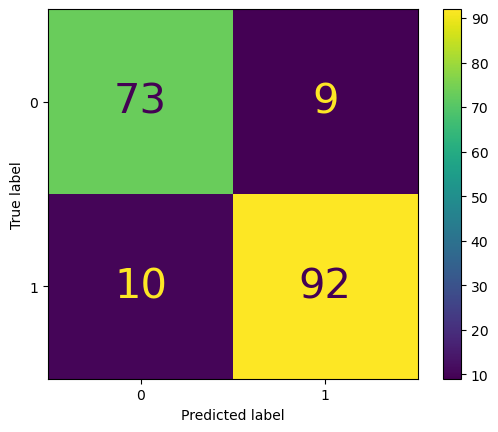

In [235]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [236]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


In [237]:
#Probemos a combinar un Knn con un GradientBoost

# Creamos ambos modelos independientes
model1 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=15, weights='distance')
model2 = GradientBoostingClassifier(random_state = 42,criterion='friedman_mse',learning_rate=0.1,loss='exponential',max_depth=3, n_estimators=160,subsample=0.8)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print('Accuracy Knn: %.3f' % model1.score(X_test, y_test))
print('Accuracy GradientBoost: %.3f' % model2.score(X_test, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('GB', model2)], voting = 'soft')
vc.fit(X_train, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test, y_test))

y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=vc.predict(X_test)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision: %.3f' % precision)
print('Recall %.3f' % recall)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print()
print('Confusion Matrix Knn')
print(cm1)
print()
print('Confusion Matrix Gradient Boost')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)

Accuracy Knn: 0.891
Accuracy GradientBoost: 0.891
Accuracy modelo combinado: 0.902
Precision: 0.896
Recall 0.931

Confusion Matrix Knn
[[71 11]
 [ 9 93]]

Confusion Matrix Gradient Boost
[[72 10]
 [10 92]]

Confusion Matrix Modelo Combinado
[[71 11]
 [ 7 95]]


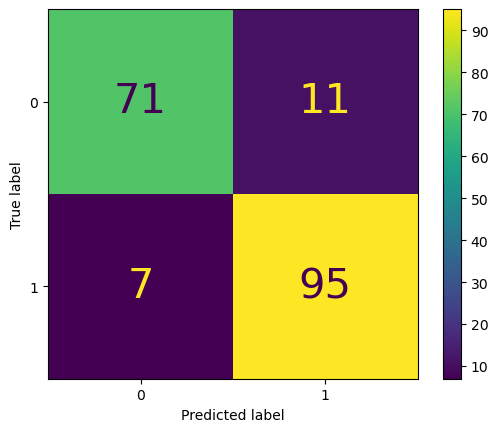

In [238]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [239]:
nueva_fila = { 'Model': 'Knn+GB', 'Accuracy': knn.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\2294665591.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [240]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


In [241]:
#Probemos a combinar un Knn con un RandomForest

# Creamos ambos modelos independientes
model1 = KNeighborsClassifier(n_neighbors=8, algorithm='auto', leaf_size=30, weights='uniform',metric='minkowski',p=2)
model2 = RandomForestClassifier(n_estimators = 110, random_state = 42, max_depth=4, criterion='entropy')

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print('Accuracy Knn: %.3f' % model1.score(X_test, y_test))
print('Accuracy Random Forest: %.3f' % model2.score(X_test, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('GB', model2)], voting = 'soft')
vc.fit(X_train, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test, y_test))

y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=vc.predict(X_test)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision modeo combinado: %.3f' % precision)
print('Recall modelo combinado: %.3f' % recall)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print()
print('Confusion Matrix Knn')
print(cm1)
print()
print('Confusion Matrix RF')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)

Accuracy Knn: 0.902
Accuracy Random Forest: 0.870
Accuracy modelo combinado: 0.891
Precision modeo combinado: 0.873
Recall modelo combinado: 0.941

Confusion Matrix Knn
[[73  9]
 [ 9 93]]

Confusion Matrix RF
[[65 17]
 [ 7 95]]

Confusion Matrix Modelo Combinado
[[68 14]
 [ 6 96]]


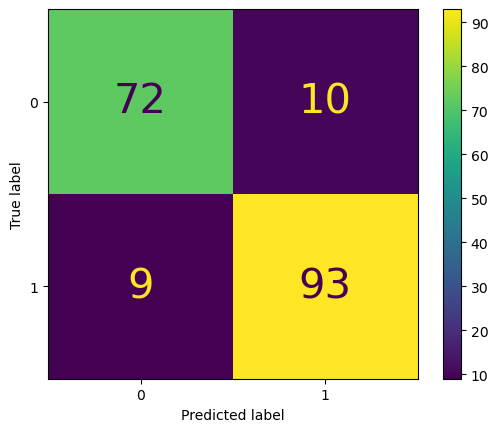

In [242]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [243]:
nueva_fila = { 'Model': 'Knn+RF', 'Accuracy': vc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\413504451.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [244]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


In [245]:
# Creamos ambos modelos independientes
model1 = KNeighborsClassifier(n_neighbors=8, algorithm='auto', leaf_size=30, weights='uniform',metric='minkowski',p=2)
model2 = LogisticRegression(random_state=42,solver='liblinear')


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print('Accuracy Knn: %.3f' % model1.score(X_test, y_test))
print('Accuracy SVC: %.3f' % model2.score(X_test, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('LR', model2)], voting = 'soft')
vc.fit(X_train, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test, y_test))

y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=vc.predict(X_test)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision modeo combinado: %.3f' % precision)
print('Recall modelo combinado: %.3f' % recall)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print()
print('Confusion Matrix Knn')
print(cm1)
print()
print('Confusion Matrix RF')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)

Accuracy Knn: 0.902
Accuracy SVC: 0.891
Accuracy modelo combinado: 0.891
Precision modeo combinado: 0.880
Recall modelo combinado: 0.931

Confusion Matrix Knn
[[73  9]
 [ 9 93]]

Confusion Matrix RF
[[69 13]
 [ 7 95]]

Confusion Matrix Modelo Combinado
[[69 13]
 [ 7 95]]


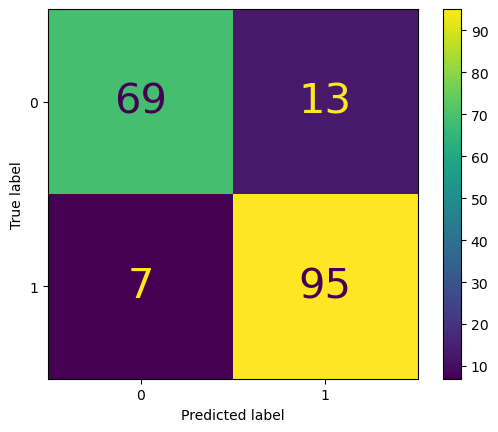

In [246]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [247]:
nueva_fila = { 'Model': 'Knn+LogReg', 'Accuracy': vc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\2369828983.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [248]:
# Creamos ambos modelos independientes
model1 = RandomForestClassifier(random_state = 42)
model2 = LogisticRegression(random_state=42,solver='liblinear')


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print('Accuracy RF: %.3f' % model1.score(X_test, y_test))
print('Accuracy logreg: %.3f' % model2.score(X_test, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('LR', model2)], voting = 'soft')
vc.fit(X_train, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test, y_test))

y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=vc.predict(X_test)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision modeo combinado: %.3f' % precision)
print('Recall modelo combinado: %.3f' % recall)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print()
print('Confusion Matrix RF')
print(cm1)
print()
print('Confusion Matrix Logreg')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)

Accuracy RF: 0.897
Accuracy logreg: 0.891
Accuracy modelo combinado: 0.897
Precision modeo combinado: 0.881
Recall modelo combinado: 0.941

Confusion Matrix RF
[[70 12]
 [ 7 95]]

Confusion Matrix Logreg
[[69 13]
 [ 7 95]]

Confusion Matrix Modelo Combinado
[[69 13]
 [ 6 96]]


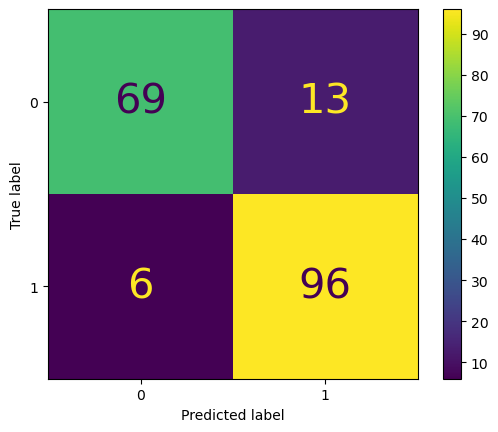

In [249]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [250]:
nueva_fila = { 'Model': 'RF+LogReg', 'Accuracy': vc.score(X_test, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\1762819362.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


## Eliminado variables poco significativas y volviendo a combinar modelos

Vamos probar eliminando las varibales menos significativas o, dicho de otro modo, vamos a quedarnos solo con las 14 mas significativas ya que el resto tienen pesos bastante bajos

De nuevo entrenamos y hacemos las predicciones con el modelo combinado que es el que mejor resultados nos ha dado. Despues de hacer varias pruebas y eliminando las variables menos significativas se ha observado que la mejor combinación de modelos es de GradienBoost con_________________________

In [251]:
#Combinación de Knn con Gradient Boosting
model1 = KNeighborsClassifier(n_neighbors=8, algorithm='auto', leaf_size=30, weights='uniform',metric='minkowski',p=2)
model2 = GradientBoostingClassifier(random_state = 42)

model1.fit(X_train_select_kbest, y_train)
model2.fit(X_train_select_kbest, y_train)

print('Accuracy Knn: %.3f' % model1.score(X_test_select_kbest, y_test))
print('Accuracy GradientBoost: %.3f' % model2.score(X_test_select_kbest, y_test))

vc = VotingClassifier(estimators = [('RF', model1), ('GB', model2)], voting = 'soft')
vc.fit(X_train_select_kbest, y_train)
       
print('Accuracy modelo combinado: %.3f' % vc.score(X_test_select_kbest, y_test))

y_pred1=model1.predict(X_test_select_kbest)
y_pred2=model2.predict(X_test_select_kbest)
y_pred3=vc.predict(X_test_select_kbest)

precision = precision_score(y_test, y_pred3, average = 'binary')
recall = recall_score(y_test, y_pred3, average = 'binary')
print('Precision modeo combinado: %.3f' % precision)
print('Recall modelo combinado %.3f' % recall)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

print()
print('Confusion Matrix Knn')
print(cm1)
print()
print('Confusion Matrix Gradient Boost')
print(cm2)
print()
print('Confusion Matrix Modelo Combinado')
print(cm3)


Accuracy Knn: 0.864
Accuracy GradientBoost: 0.864
Accuracy modelo combinado: 0.902
Precision modeo combinado: 0.904
Recall modelo combinado 0.922

Confusion Matrix Knn
[[68 14]
 [11 91]]

Confusion Matrix Gradient Boost
[[72 10]
 [15 87]]

Confusion Matrix Modelo Combinado
[[72 10]
 [ 8 94]]


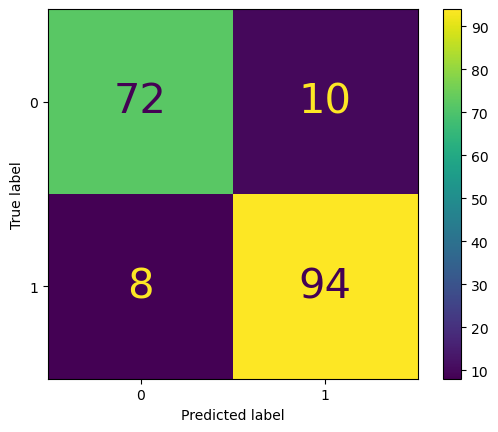

In [252]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logreg.classes_)
disp.plot()
plt.grid(False)
for text in disp.text_.ravel():
    text.set_fontsize(30)

In [253]:
nueva_fila = { 'Model': 'Knn+GB_Best_Variables', 'Accuracy': vc.score(X_test_select_kbest, y_test), 'Precision': precision ,'Recall': recall}
resultados=resultados.append(nueva_fila, ignore_index=True)

C:\Users\csales\AppData\Local\Temp\ipykernel_25960\339811708.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados=resultados.append(nueva_fila, ignore_index=True)


In [254]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


En el modelo combinado se ha mejorado un poco eliminado estas variables con poco peso.

## Curva ROC

Al estar unicamente definida para el caso binario utilizaremos la clase 2 como ejemplo. Partimos del modelo GradientBoosting quye es el que mejore resultado nos ha ofrecido hasta el momento. Lo primero que hacemos es entrenarlo con las 10 variables mas significativas

In [255]:
#inicio pruebas

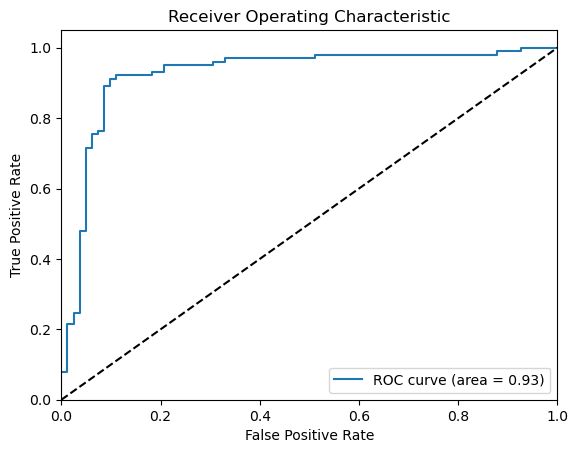

In [256]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred = vc.predict_proba(X_test_select_kbest)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [257]:
#fin pruebas

Dibujamos la curva ROC y su área para cada una de las clases:

En este caso vemos que el recall es bastante constante hasta un punto de corte de 0.6. En principio establecemos este punto de corte como máximo para clasificar a estos pacientes.
Hagamos lo mismo para el otro caso:

En este caso se observa que la tanto la precisión como el recall son bastante constantes en toda la gráfica. Esto puede ser debido a que el conjunto no está equilibrado ya que en nustro conjunto tenemos pocos pacientes clasificados como patológicos en comparació  al resto. Una primera instancia para seguir investigando el punto de corte en este caso sería incorporar más datos a nuestro modelo.

# DISCUSION

In [258]:
resultados

,Model,Accuracy,Precision,Recall
0,LogisticRegresion,0.891304,0.879630,0.931373
1,LogisticRegresion_No_Outlayers,0.896226,0.878788,0.852941
2,Decission_Tree,0.788043,0.805825,0.813725
3,SVC,0.880435,0.857143,0.941176
4,SVC_No_Outlayers,0.896226,0.836364,0.901961
5,SVC_Best_Params,0.950980,0.734848,0.950980
6,Knn,0.902174,0.911765,0.911765
7,Knn_Best_Params,0.902174,0.911765,0.911765
8,MLP,0.902174,0.854545,0.921569
9,RF,0.896739,0.902913,0.911765


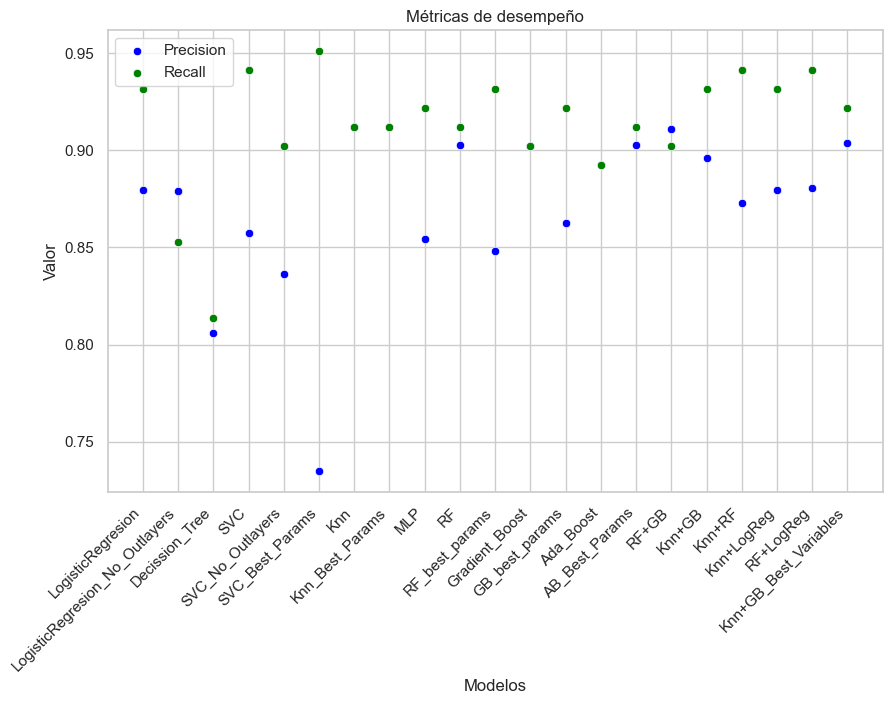

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model', y='Precision', data=resultados, color='blue', label='Precision')
sns.scatterplot(x='Model', y='Recall', data=resultados, color='green', label='Recall')

# Configurar las etiquetas de los ejes y el título
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Métricas de desempeño')

# Mostrar la leyenda
plt.legend()

# Ajustar los ejes x para evitar solapamientos
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


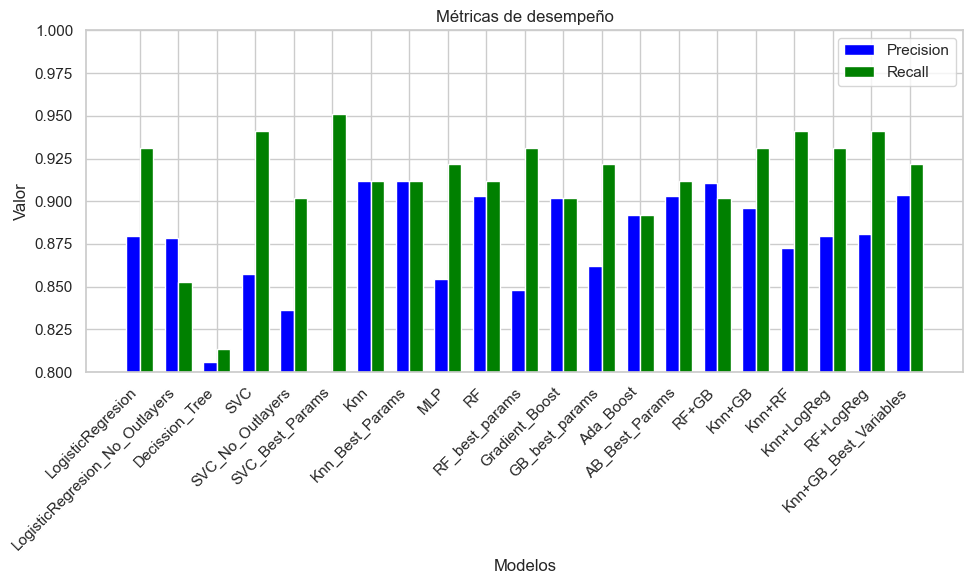

In [260]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Obtener los datos de precisión y recall
precision_data = resultados['Precision']
recall_data = resultados['Recall']
modelos = resultados['Model']

# Configurar el ancho de las barras
bar_width = 0.35

# Calcular la posición de las barras en el eje x
index = np.arange(len(modelos))

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar(index, precision_data, bar_width, color='blue', label='Precision')
plt.bar(index + bar_width, recall_data, bar_width, color='green', label='Recall')

# Configurar las etiquetas de los ejes y el título
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Métricas de desempeño')

# Ajustar los ejes x para evitar solapamientos
plt.xticks(index + bar_width/2, modelos, rotation=45, ha='right')

# Establecer el rango del eje y
plt.ylim([0.8, 1.0])  # Ajusta los límites según tus necesidades

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


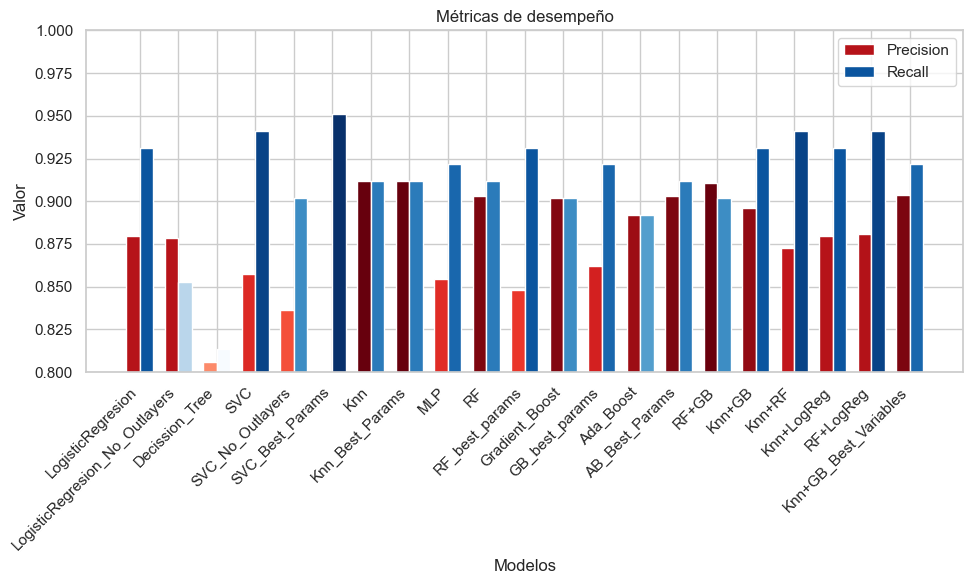

In [261]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Obtener los datos de precisión y recall
precision_data = resultados['Precision']
recall_data = resultados['Recall']
modelos = resultados['Model']

# Configurar el ancho de las barras
bar_width = 0.35

# Calcular la posición de las barras en el eje x
index = np.arange(len(modelos))

# Normalizar los valores de precisión y recall en el rango [0, 1]
precision_normalized = (precision_data - precision_data.min()) / (precision_data.max() - precision_data.min())
recall_normalized = (recall_data - recall_data.min()) / (recall_data.max() - recall_data.min())

# Generar una secuencia de colores normalizados en función de los valores de precisión y recall
precision_colors = plt.cm.Reds(precision_normalized)
recall_colors = plt.cm.Blues(recall_normalized)

# Crear el gráfico de barras agrupadas con colores escalados dentro de las barras
plt.figure(figsize=(10, 6))
plt.bar(index, precision_data, bar_width, color=precision_colors, label='Precision')
plt.bar(index + bar_width, recall_data, bar_width, color=recall_colors, label='Recall')

# Configurar las etiquetas de los ejes y el título
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Métricas de desempeño')

# Ajustar los ejes x para evitar solapamientos
plt.xticks(index + bar_width/2, modelos, rotation=45, ha='right')

# Establecer el rango del eje y
plt.ylim([0.8, 1.0])  # Ajusta los límites según tus necesidades

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


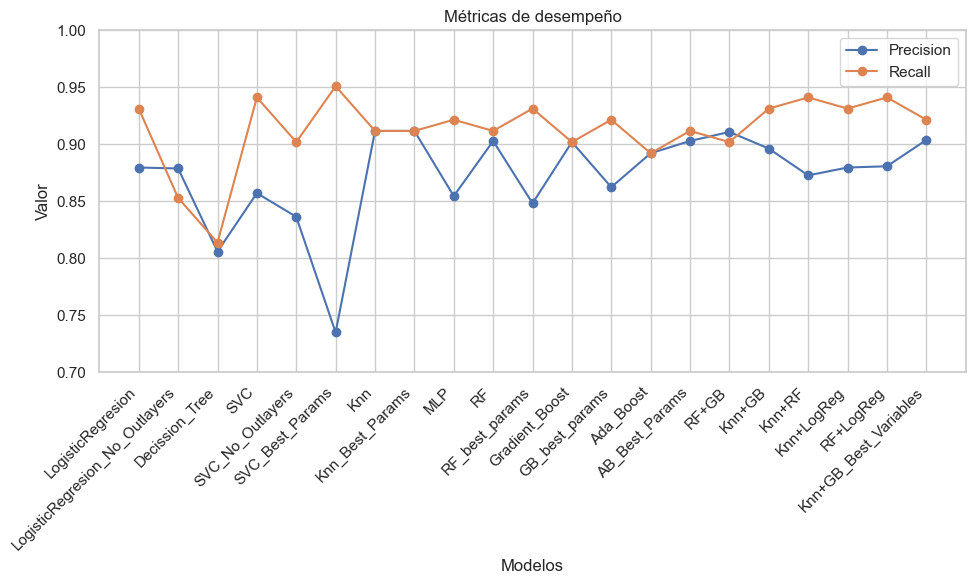

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los datos de precisión y recall
precision_data = resultados['Precision']
recall_data = resultados['Recall']
modelos = resultados['Model']

# Calcular la posición de los puntos en el eje x
x = np.arange(len(modelos))

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Trazar la línea de precisión
ax.plot(x, precision_data, marker='o', label='Precision')

# Trazar la línea de recall
ax.plot(x, recall_data, marker='o', label='Recall')

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valor')
ax.set_title('Métricas de desempeño')

# Ajustar los ejes x para evitar solapamientos
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha='right')

# Establecer el rango del eje y
ax.set_ylim([0.7, 1.0])  # Ajusta los límites según tus necesidades

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.grid(True)
plt.show()



En general, despues de todas las pruebas realizadas, el mejor resultado ha sido combinando un KNN con un GradientBoosting, ambos con sus hiperparámetros optimizados. En este caso particular, aunque el accuracy es muy importante a nivel general, la matriz de confusión nos da mucha mas información ya que tenemos 3 categorías distintas y puede que no esté balanceado o que no respondan de manera uniforme a los modelos.

Según nuestro caso de uso, en el ámbito médico, tenemos que ser conservadores y partir siempre de que, en caso de error en el modelo, es mejor clasificar a un paciente como sospechoso o patológico aunque sea normal, que clasificarlo como normal cuando realmente tiene un estado de salud sospechoso o patológico. Por ello como tenemos varios pacientes clasiificados como normales cuando deberían ser patológicos y unos pocos(pero no menos importantes) clasificados como normales/sospechosos cuando deberían ser patológicos, deberíamos de recurrir a alguna de las siguientes opciones:

-Seguir realizando pruebas para intentar mejorar la tasa de acierto en esos casos.
-Disminuir el punto de corte para que, aunque aumenten los casos clasificados incorrectamente como patlógicos, disminuyan los clasificados erróneamente como normales o sospechosos.

Por estas razones, tienendo en cuenta la gravedad y consecuencias que puede tener una clasificación errónea en este caso de uso, no se recomienda que el 100% de las decisiones recayeran en este modelo si se pusiera en producción. Tan solo debería de servir como método de respaldo de una evaluación realizada por un profesional médico.


# CONCLUSIONES

Se ha visto que la complejidad de elaborar un modelo de aprendizaje automático no es sencilla ni mucho menos. Existen incontables modelos de predicción, multiplicado por todos los parámetros posibles de estos y las transformaciones de los datos que pueden influir en los resultados y tasas de acierto.

Una máquina nunca podrá obtener una predicción correcta en el 100% de los casos, pero jugando con transformaciones, entrenamientos y parámetros se pueden conseguir tomas de decisiones aceptables para ponerlas en producción. Relativo a lo de antes, la puesta en producción de estos modelos depende del caso de uso y de las consecuencias que puede llevar a cabo una decisión errónea.

En el presente trabajo se han llevado a cabo muchísimas pruebas para mejorar estas predicciones, sin embargo la tarea de mejora no tiene fin ya que son tantos parámetros y procesos que se pueden modificar para probar diferentes caminos que podrían mejorar el modelo de predicción.